In [1]:
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate

In [2]:
with open('./data_raw/s4_cut_forces.pkl', 'rb') as f:
        student_4 = pickle.load(f,encoding="bytes") # remove "encoding" parameter if in Python 2 kernel

with open('./data_raw/s11_cut_forces.pkl', 'rb') as f:
        student_11 = pickle.load(f,encoding="bytes") # remove "encoding" parameter if in Python 2 kernel

In [22]:
from scipy.io import savemat

def savematfiles(reference, reference_us, profile, profile_us, student, cut, num):
    
    student = str(student).zfill(2)
    cut = str(cut).zfill(2)
    
    mdic = {'reference': reference_us, 'actual': profile_us,'Ts': 0.001}
    savemat('./data_processed/transient/1kHz/student'+str(student)+'cut'+str(cut)+'_'+str(num)+'_1kHz.mat', mdic)

    mdic = {'reference': reference, 'actual': profile,'Ts': 0.0333}
    savemat('./data_processed/transient/30Hz/student'+str(student)+'cut'+str(cut)+'_'+str(num)+'_30Hz.mat', mdic)
    
def upsample(reference,profile):
    
    # Upsample from 30Hz to 1kHz, (for dt=0.001 step)
    xnew = np.arange(0,reference.shape[0]-1,1/33.33)
    reference_inter = interpolate.interp1d(x=np.arange(reference.shape[0]),y=reference)
    reference_us = reference_inter(xnew)
    
    xnew = np.arange(0,profile.shape[0]-1,1/33.33)
    profile_inter = interpolate.interp1d(x=np.arange(profile.shape[0]),y=profile)
    profile_us = profile_inter(xnew)
    
    return reference_us, profile_us

# Student 11 (reference)

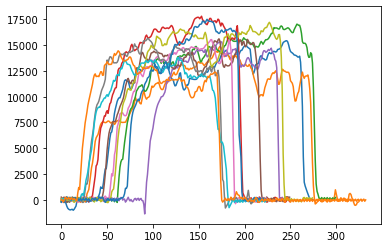

In [4]:
for i in range(12):
    plt.plot(student_11[i])
plt.show()

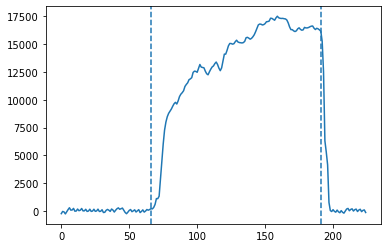

In [5]:
# Here we slice the ROI of each force profile
cut = 10
startx = [40,25,60,33,91,45,52,25,50,20,66,18]
endx = [260,270,273,192,235,215,184,172,238,163,191,170]

plt.plot(student_11[cut])
plt.axvline(x=startx[cut],ls='--')
plt.axvline(x=endx[cut],ls='--')
plt.show()

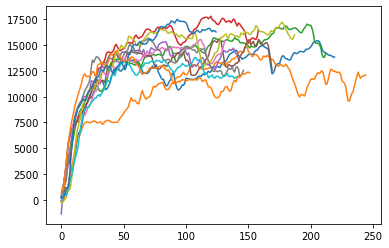

In [6]:
for cut in range(12):
    plt.plot(student_11[cut][startx[cut]:endx[cut]])
plt.show()

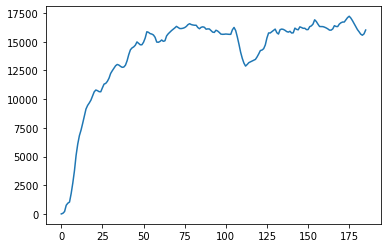

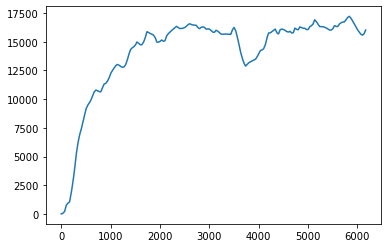

In [7]:
# Choose reference force profile 
reference = np.copy(student_11[8][startx[8]:endx[8]])
reference[np.where(reference < 0)[0]] = 0
reference = reference[max(np.where(reference == 0)[0]):]
plt.plot(reference); plt.show()

# Upsample from 30Hz to 1kHz, (for dt=0.001 step)
xnew = np.arange(0,reference.shape[0]-1,1/33.33)
reference_inter = interpolate.interp1d(x=np.arange(reference.shape[0]),y=reference)
reference_us = reference_inter(xnew)
plt.plot(reference_us); plt.show();

# Student 4

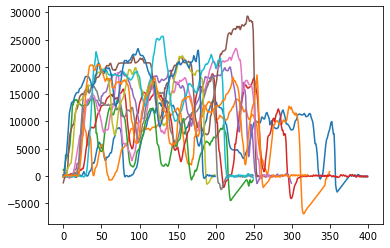

In [8]:
for i in range(12):
    plt.plot(student_4[i])
plt.show()

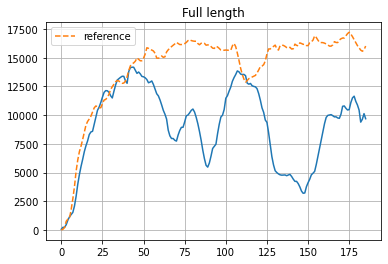

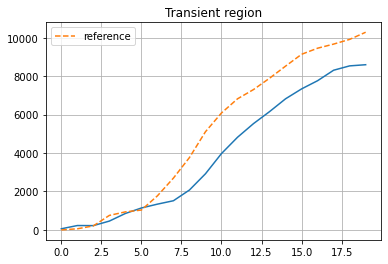

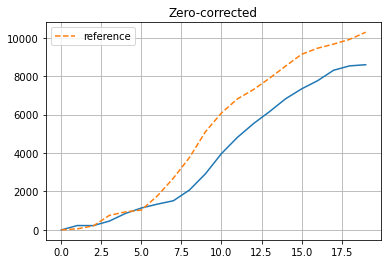

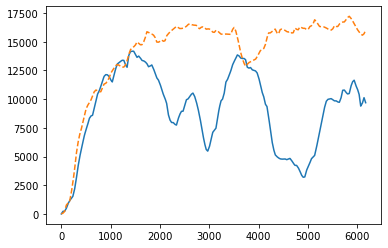

In [23]:
# Here we slice the ROI of each force profile
student = 4
cut = 0
num = 0
startx = 89

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference,profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

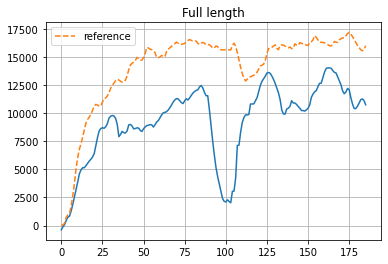

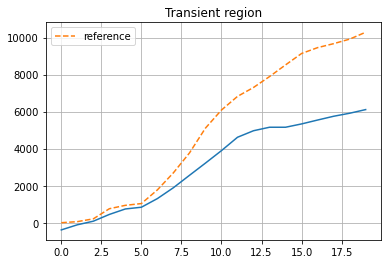

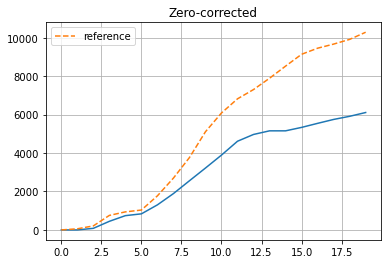

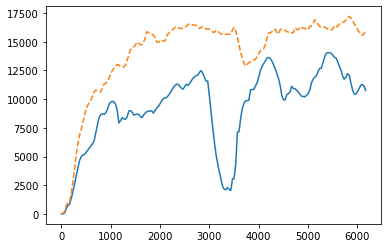

In [24]:
# Here we slice the ROI of each force profile
student = 4
cut = 1
num = 0
startx = 65
# endx = 115

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

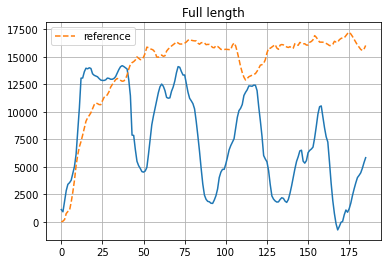

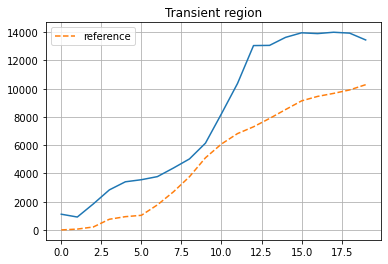

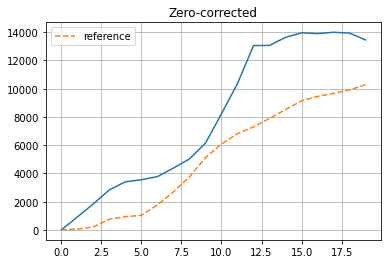

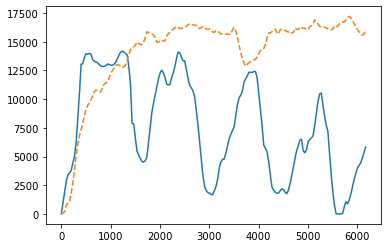

In [30]:
# Here we slice the ROI of each force profile
student = 4
cut = 2
num = 0
startx = 0
# endx = 50

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

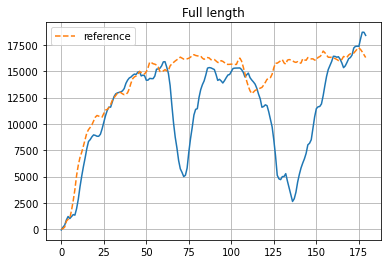

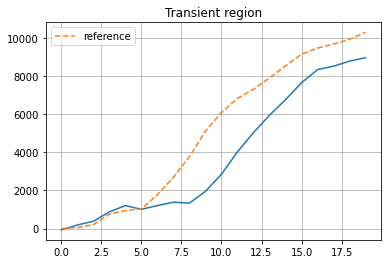

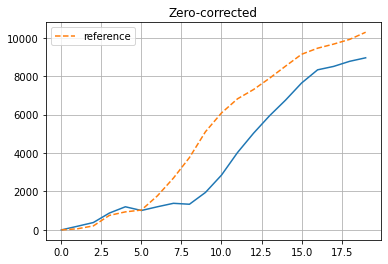

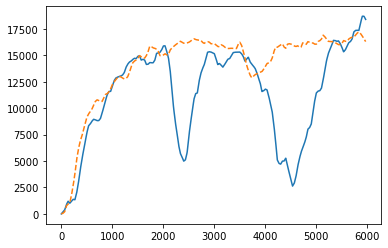

In [35]:
# Here we slice the ROI of each force profile
student = 4
cut = 3
num = 0
startx = 18
endx = 180

plt.plot(student_4[cut][startx:startx+reference[:endx].shape[0]])
plt.plot(reference[:endx],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:endx].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:endx],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

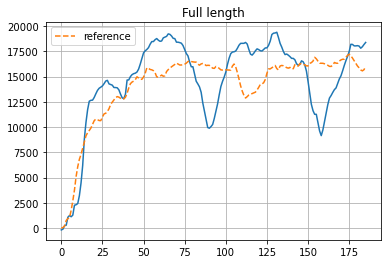

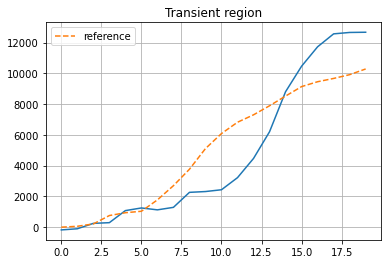

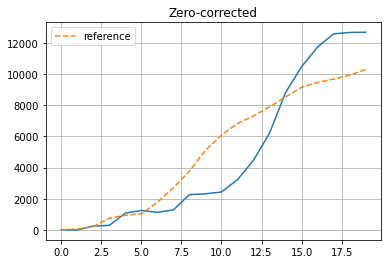

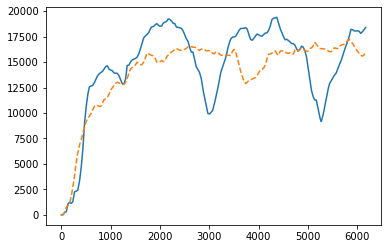

In [39]:
# Here we slice the ROI of each force profile
student = 4
cut = 4
num = 0
startx = 10
# endx = 73

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

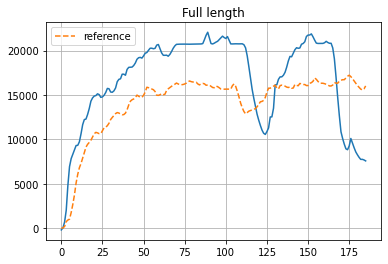

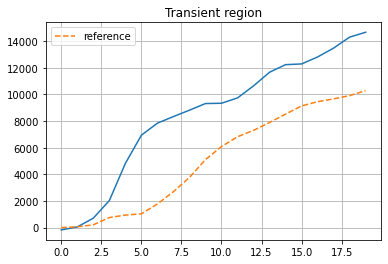

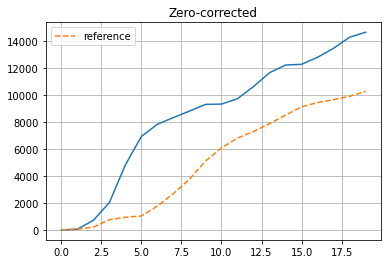

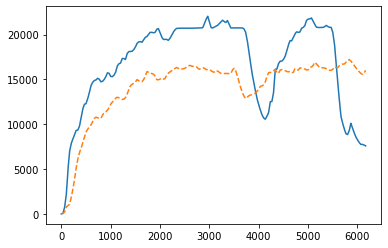

In [42]:
# Here we slice the ROI of each force profile
student = 4
cut = 5
num = 0
startx = 3
# endx = 187

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

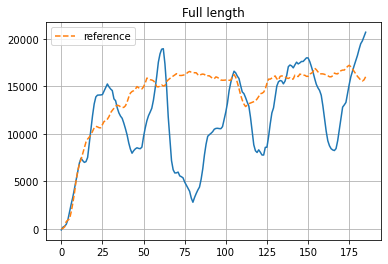

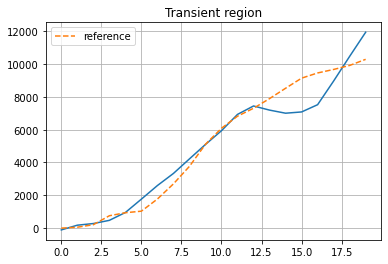

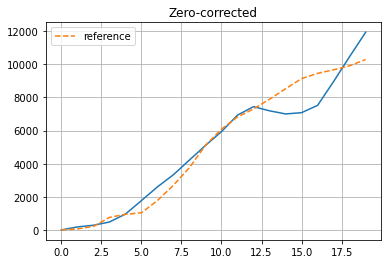

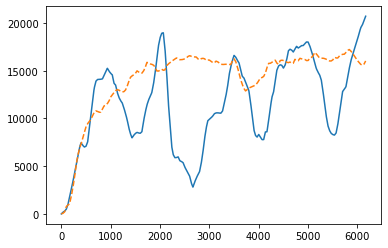

In [45]:
# Here we slice the ROI of each force profile
student = 4
cut = 6
num = 0
startx = 10
# endx = 48

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

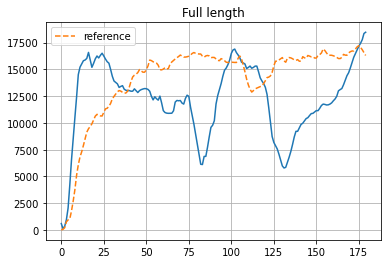

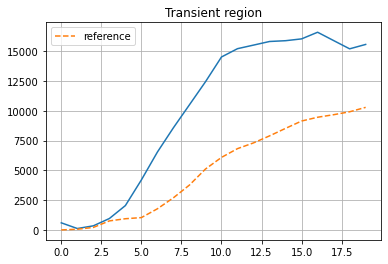

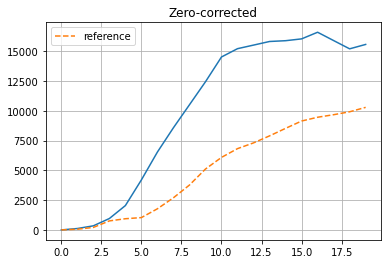

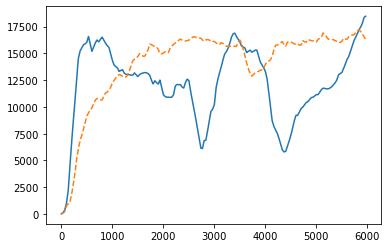

In [51]:
# Here we slice the ROI of each force profile
student = 4
cut = 7
num = 0
startx = 16
endx = 180

plt.plot(student_4[cut][startx:startx+reference[:endx].shape[0]])
plt.plot(reference[:endx],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:endx].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:endx],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

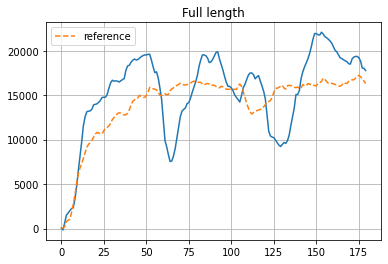

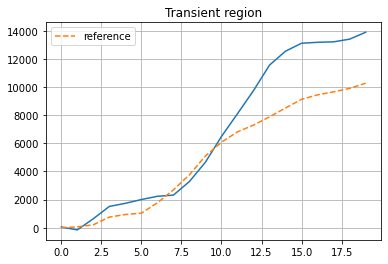

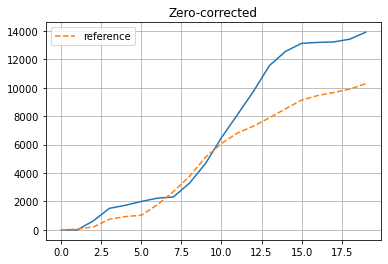

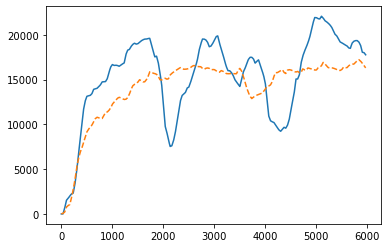

In [55]:
# Here we slice the ROI of each force profile
student = 4
cut = 8
num = 0
startx = 3
endx = 180

plt.plot(student_4[cut][startx:startx+reference[:endx].shape[0]])
plt.plot(reference[:endx],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:endx].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:endx],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

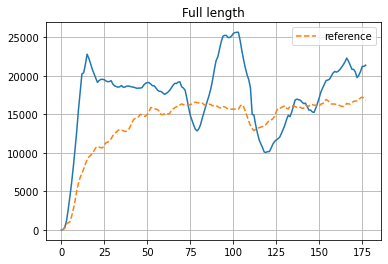

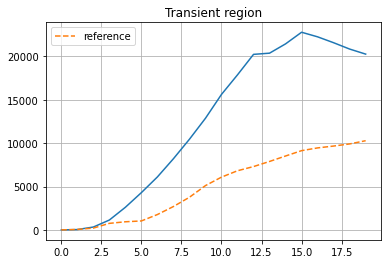

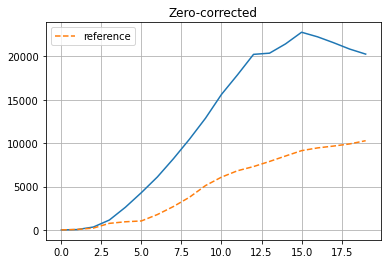

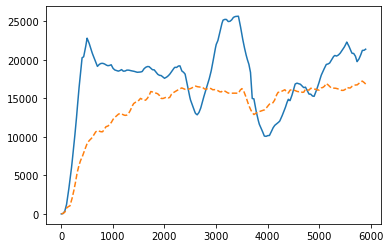

In [60]:
# Here we slice the ROI of each force profile
student = 4
cut = 9
num = 0
startx = 28
endx = 178

plt.plot(student_4[cut][startx:startx+reference[:endx].shape[0]])
plt.plot(reference[:endx],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:endx].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:endx],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

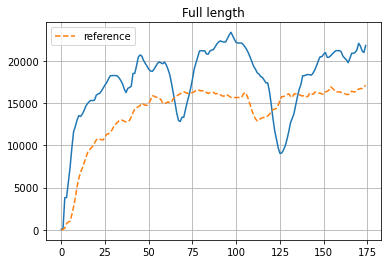

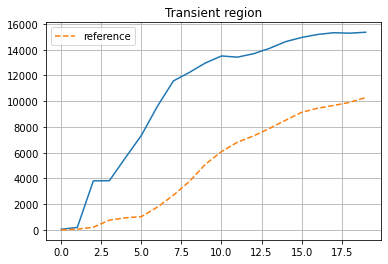

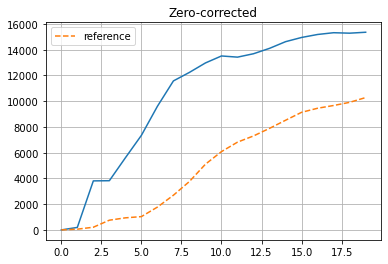

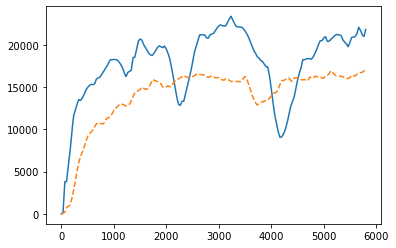

In [67]:
# Here we slice the ROI of each force profile
student = 4
cut = 10
num = 0
startx = 1
endx = 175

plt.plot(student_4[cut][startx:startx+reference[:endx].shape[0]])
plt.plot(reference[:endx],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:endx].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:endx],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

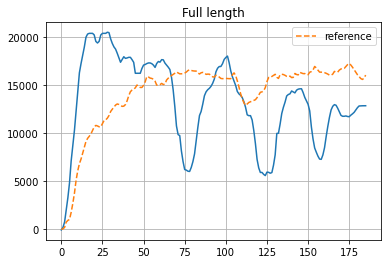

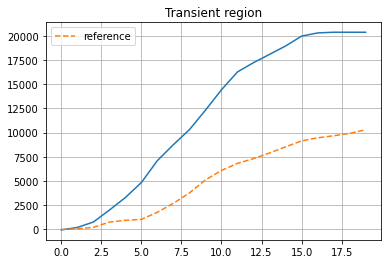

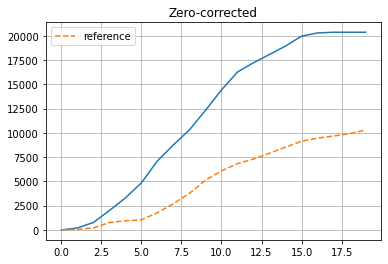

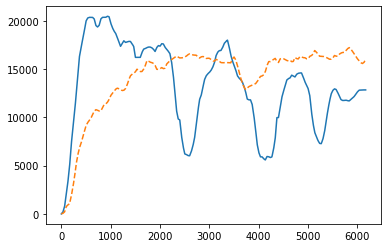

In [73]:
# Here we slice the ROI of each force profile
student = 4
cut = 11
num = 0
startx = 19
# endx = 174

plt.plot(student_4[cut][startx:startx+reference[:].shape[0]])
plt.plot(reference[:],'--',label='reference') 
plt.legend(); plt.grid(); plt.title('Full length'); plt.show()

plt.plot(student_4[cut][startx:startx+reference[:20].shape[0]])
plt.plot(reference[:20],'--',label='reference'); 
plt.legend(); plt.grid(); plt.title('Transient region'); plt.show()

profile = np.copy(student_4[cut][startx:startx+reference[:].shape[0]])
profile[np.where(profile < 0)[0]] = 0
profile[0] = 0

plt.plot(profile[:20]); plt.plot(reference[:20],'--',label='reference')
plt.legend(); plt.grid(); plt.title('Zero-corrected'); plt.show()

# Upsample
reference_us, profile_us = upsample(reference[:],profile)
plt.plot(profile_us)
plt.plot(reference_us,'--')

# Save
savematfiles(reference, reference_us, profile, profile_us, student, cut, num)

# Student 4. Summary

12


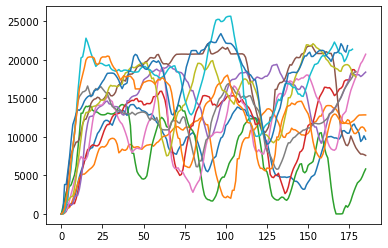

In [76]:
import scipy.io
# mat = scipy.io.loadmat('file.mat')

student4_files = ['student04cut00_0_30Hz.mat','student04cut01_0_30Hz.mat','student04cut02_0_30Hz.mat',
                 'student04cut03_0_30Hz.mat','student04cut04_0_30Hz.mat','student04cut05_0_30Hz.mat',
                 'student04cut06_0_30Hz.mat','student04cut07_0_30Hz.mat','student04cut08_0_30Hz.mat',
                 'student04cut09_0_30Hz.mat','student04cut10_0_30Hz.mat','student04cut11_0_30Hz.mat']

cutting_profiles = []

for i in range(len(student4_files)):
    cutting_profiles.append(scipy.io.loadmat('./data_processed/transient/30Hz/'+student4_files[i])['actual'][0])
    
for i in range(len(cutting_profiles)):
    plt.plot(cutting_profiles[i])
    
print(len(cutting_profiles))